<a href="https://colab.research.google.com/github/ritambharajha/GuidanceSystem_NetworkAnalysis_DSCI601/blob/main/Project601_Guidance_System_RPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1> <center> Guidance System for Retaliatory Violence in Rochester using Network Analysis </center> </H1>
Advisor: Prof. Irshad Alteimer<br>
Team: Ritambhara Jha, Sreenidhi Sridhar, Carter Brazell

In [1]:
#Mounting the google drive to get access to the dataset.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing python libraries needed for the network analysis.
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading the edge and node files.
file_edge = "/content/drive/Shareddrives/CPSI Capstone Group/Edge.xlsx"
file_node = "/content/drive/Shareddrives/CPSI Capstone Group/Node.xlsx"
Gang_edges = pd.read_excel(file_edge)
Gang_nodes = pd.read_excel(file_node)

In [4]:
#Displaying node data.
Gang_nodes

MCAC ID        ID            Names  Suspect  Victim  Witness
0    10-001  308786.0   Anthony Gibson      0.0     1.0      0.0
1    10-001  298149.0   Torrasha Smith      1.0     0.0      0.0
2    10-001  332152.0     Keith Travis      1.0     0.0      0.0
3    10-001  300956.0       Kendra Key      1.0     0.0      0.0
4    10-005  306089.0    Andrew Cooper      0.0     1.0      0.0
..      ...       ...              ...      ...     ...      ...
859  13-019  346886.0    Joshua Harper      0.0     0.0      0.0
860  13-019  289686.0  Alexis McIntyre      0.0     0.0      0.0
861  13-019  295301.0   Sharod Tramell      0.0     0.0      0.0
862  13-019  247938.0     Barry Turner      0.0     1.0      0.0
863  13-019  299284.0      Eric Majors      0.0     1.0      0.0

[864 rows x 6 columns]

In [5]:
#Displaying edge data.
Gang_edges

MCAC ID        ID            Names
0    10-001  308786.0   Anthony Gibson
1    10-001  298149.0   Torrasha Smith
2    10-001  332152.0     Keith Travis
3    10-001  300956.0       Kendra Key
4    10-005  306089.0    Andrew Cooper
..      ...       ...              ...
859  13-019  346886.0    Joshua Harper
860  13-019  289686.0  Alexis McIntyre
861  13-019  295301.0   Sharod Tramell
862  13-019  247938.0     Barry Turner
863  13-019  299284.0      Eric Majors

[864 rows x 3 columns]

In [6]:
#Populating Graphs
G = nx.Graph()
dispute_dict = {} 

for index, row in Gang_nodes.iterrows():
  MCAC_ID = row['MCAC ID']
  ID = int(row['ID'])
  name = row['Names']
  # print(MCAC_ID, ID, name)

  if ID not in G:
    G.add_node(ID, MCAC_ID=MCAC_ID, ID=ID, name=name)

  if MCAC_ID not in dispute_dict:
    dispute_dict[MCAC_ID] = [ID]
  else:
    dispute_dict[MCAC_ID].append(ID)

self_loops = False

for MCAC_ID in dispute_dict:
  IDs = dispute_dict[MCAC_ID]
  edges = [(IDs[i], IDs[j], {'MCAC ID':MCAC_ID}) for i in range(len(IDs)) for j in range(i+(1-int(self_loops)),len(IDs))]
  G.add_edges_from(edges)
  

In [7]:
#Displaying node attributes.
for node in G.nodes(data=True):
  print(node)

(308786, {'MCAC_ID': '10-001', 'ID': 308786, 'name': 'Anthony Gibson'})
(298149, {'MCAC_ID': '10-001', 'ID': 298149, 'name': 'Torrasha Smith'})
(332152, {'MCAC_ID': '10-001', 'ID': 332152, 'name': 'Keith Travis'})
(300956, {'MCAC_ID': '10-001', 'ID': 300956, 'name': 'Kendra Key'})
(306089, {'MCAC_ID': '10-005', 'ID': 306089, 'name': 'Andrew Cooper'})
(314853, {'MCAC_ID': '10-005', 'ID': 314853, 'name': 'Gregory Cooper'})
(319618, {'MCAC_ID': '10-005', 'ID': 319618, 'name': 'Damerick Love'})
(317140, {'MCAC_ID': '10-005', 'ID': 317140, 'name': 'Dayquan Love'})
(344698, {'MCAC_ID': '10-005', 'ID': 344698, 'name': 'Siomarie Mora'})
(252830, {'MCAC_ID': '10-005', 'ID': 252830, 'name': 'Charlene Riley'})
(312002, {'MCAC_ID': '10-005', 'ID': 312002, 'name': 'Harry Torres Jr'})
(302516, {'MCAC_ID': '10-005', 'ID': 302516, 'name': 'Grisel Roman'})
(101692, {'MCAC_ID': '10-005', 'ID': 101692, 'name': 'Harlin Torres'})
(258129, {'MCAC_ID': '10-005', 'ID': 258129, 'name': 'Harry Torres Sr'})
(327

In [8]:
#Displaying edge attributes.
for edge in G.edges(data=True):
  print(edge)

Streaming output truncated to the last 5000 lines.
(294587, 313335, {'MCAC ID': '11-008'})
(294587, 334896, {'MCAC ID': '11-008'})
(294587, 202102, {'MCAC ID': '11-008'})
(323578, 305158, {'MCAC ID': '10-026'})
(323578, 208028, {'MCAC ID': '10-026'})
(323578, 284669, {'MCAC ID': '10-026'})
(323578, 326100, {'MCAC ID': '10-026'})
(323578, 233679, {'MCAC ID': '10-026'})
(323578, 274953, {'MCAC ID': '10-026'})
(305158, 208028, {'MCAC ID': '10-026'})
(305158, 284669, {'MCAC ID': '10-026'})
(305158, 326100, {'MCAC ID': '10-026'})
(305158, 233679, {'MCAC ID': '10-026'})
(305158, 274953, {'MCAC ID': '10-026'})
(208028, 284669, {'MCAC ID': '10-026'})
(208028, 326100, {'MCAC ID': '10-026'})
(208028, 233679, {'MCAC ID': '10-026'})
(208028, 274953, {'MCAC ID': '10-026'})
(284669, 326100, {'MCAC ID': '10-026'})
(284669, 233679, {'MCAC ID': '10-026'})
(284669, 274953, {'MCAC ID': '10-026'})
(326100, 233679, {'MCAC ID': '10-026'})
(326100, 274953, {'MCAC ID': '10-026'})
(233679, 274953, {'MCAC ID': 

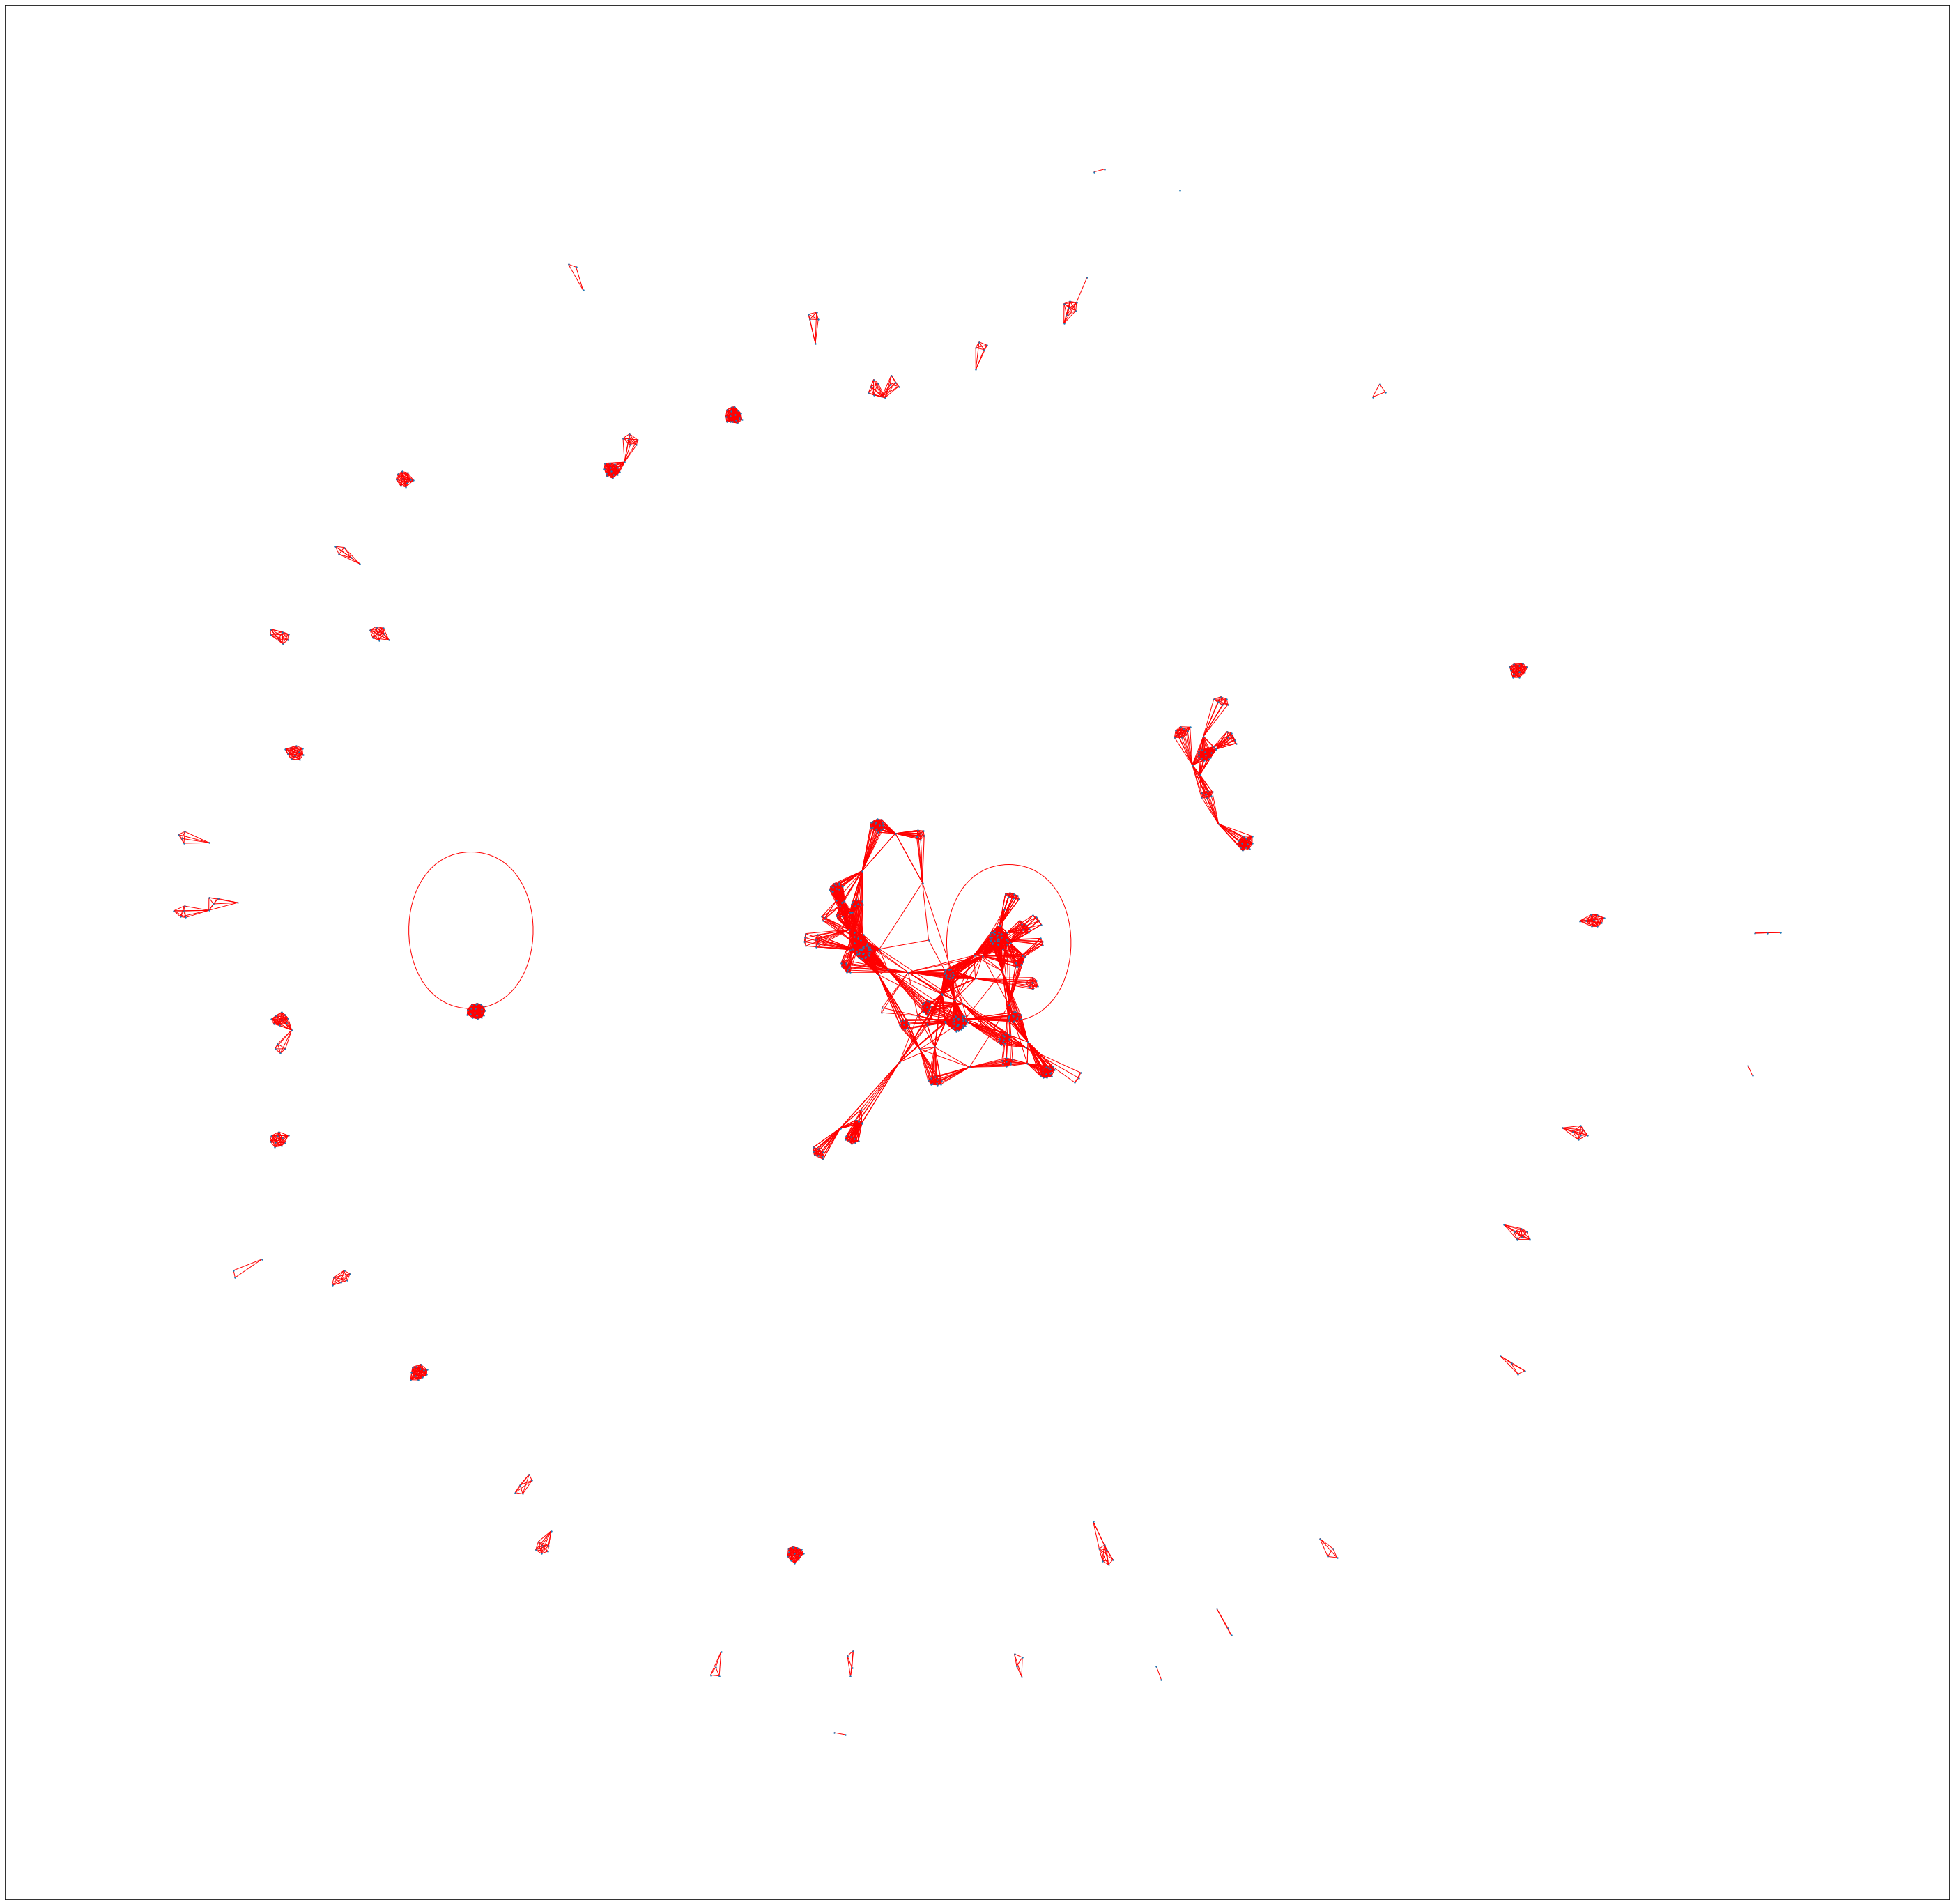

In [10]:

#plotting general network with spring layout.
pos = nx.spring_layout(G) #positions for all nodes
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=2)
# nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Initial_network.png", formant="PNG", dpi=300)
plt.show()

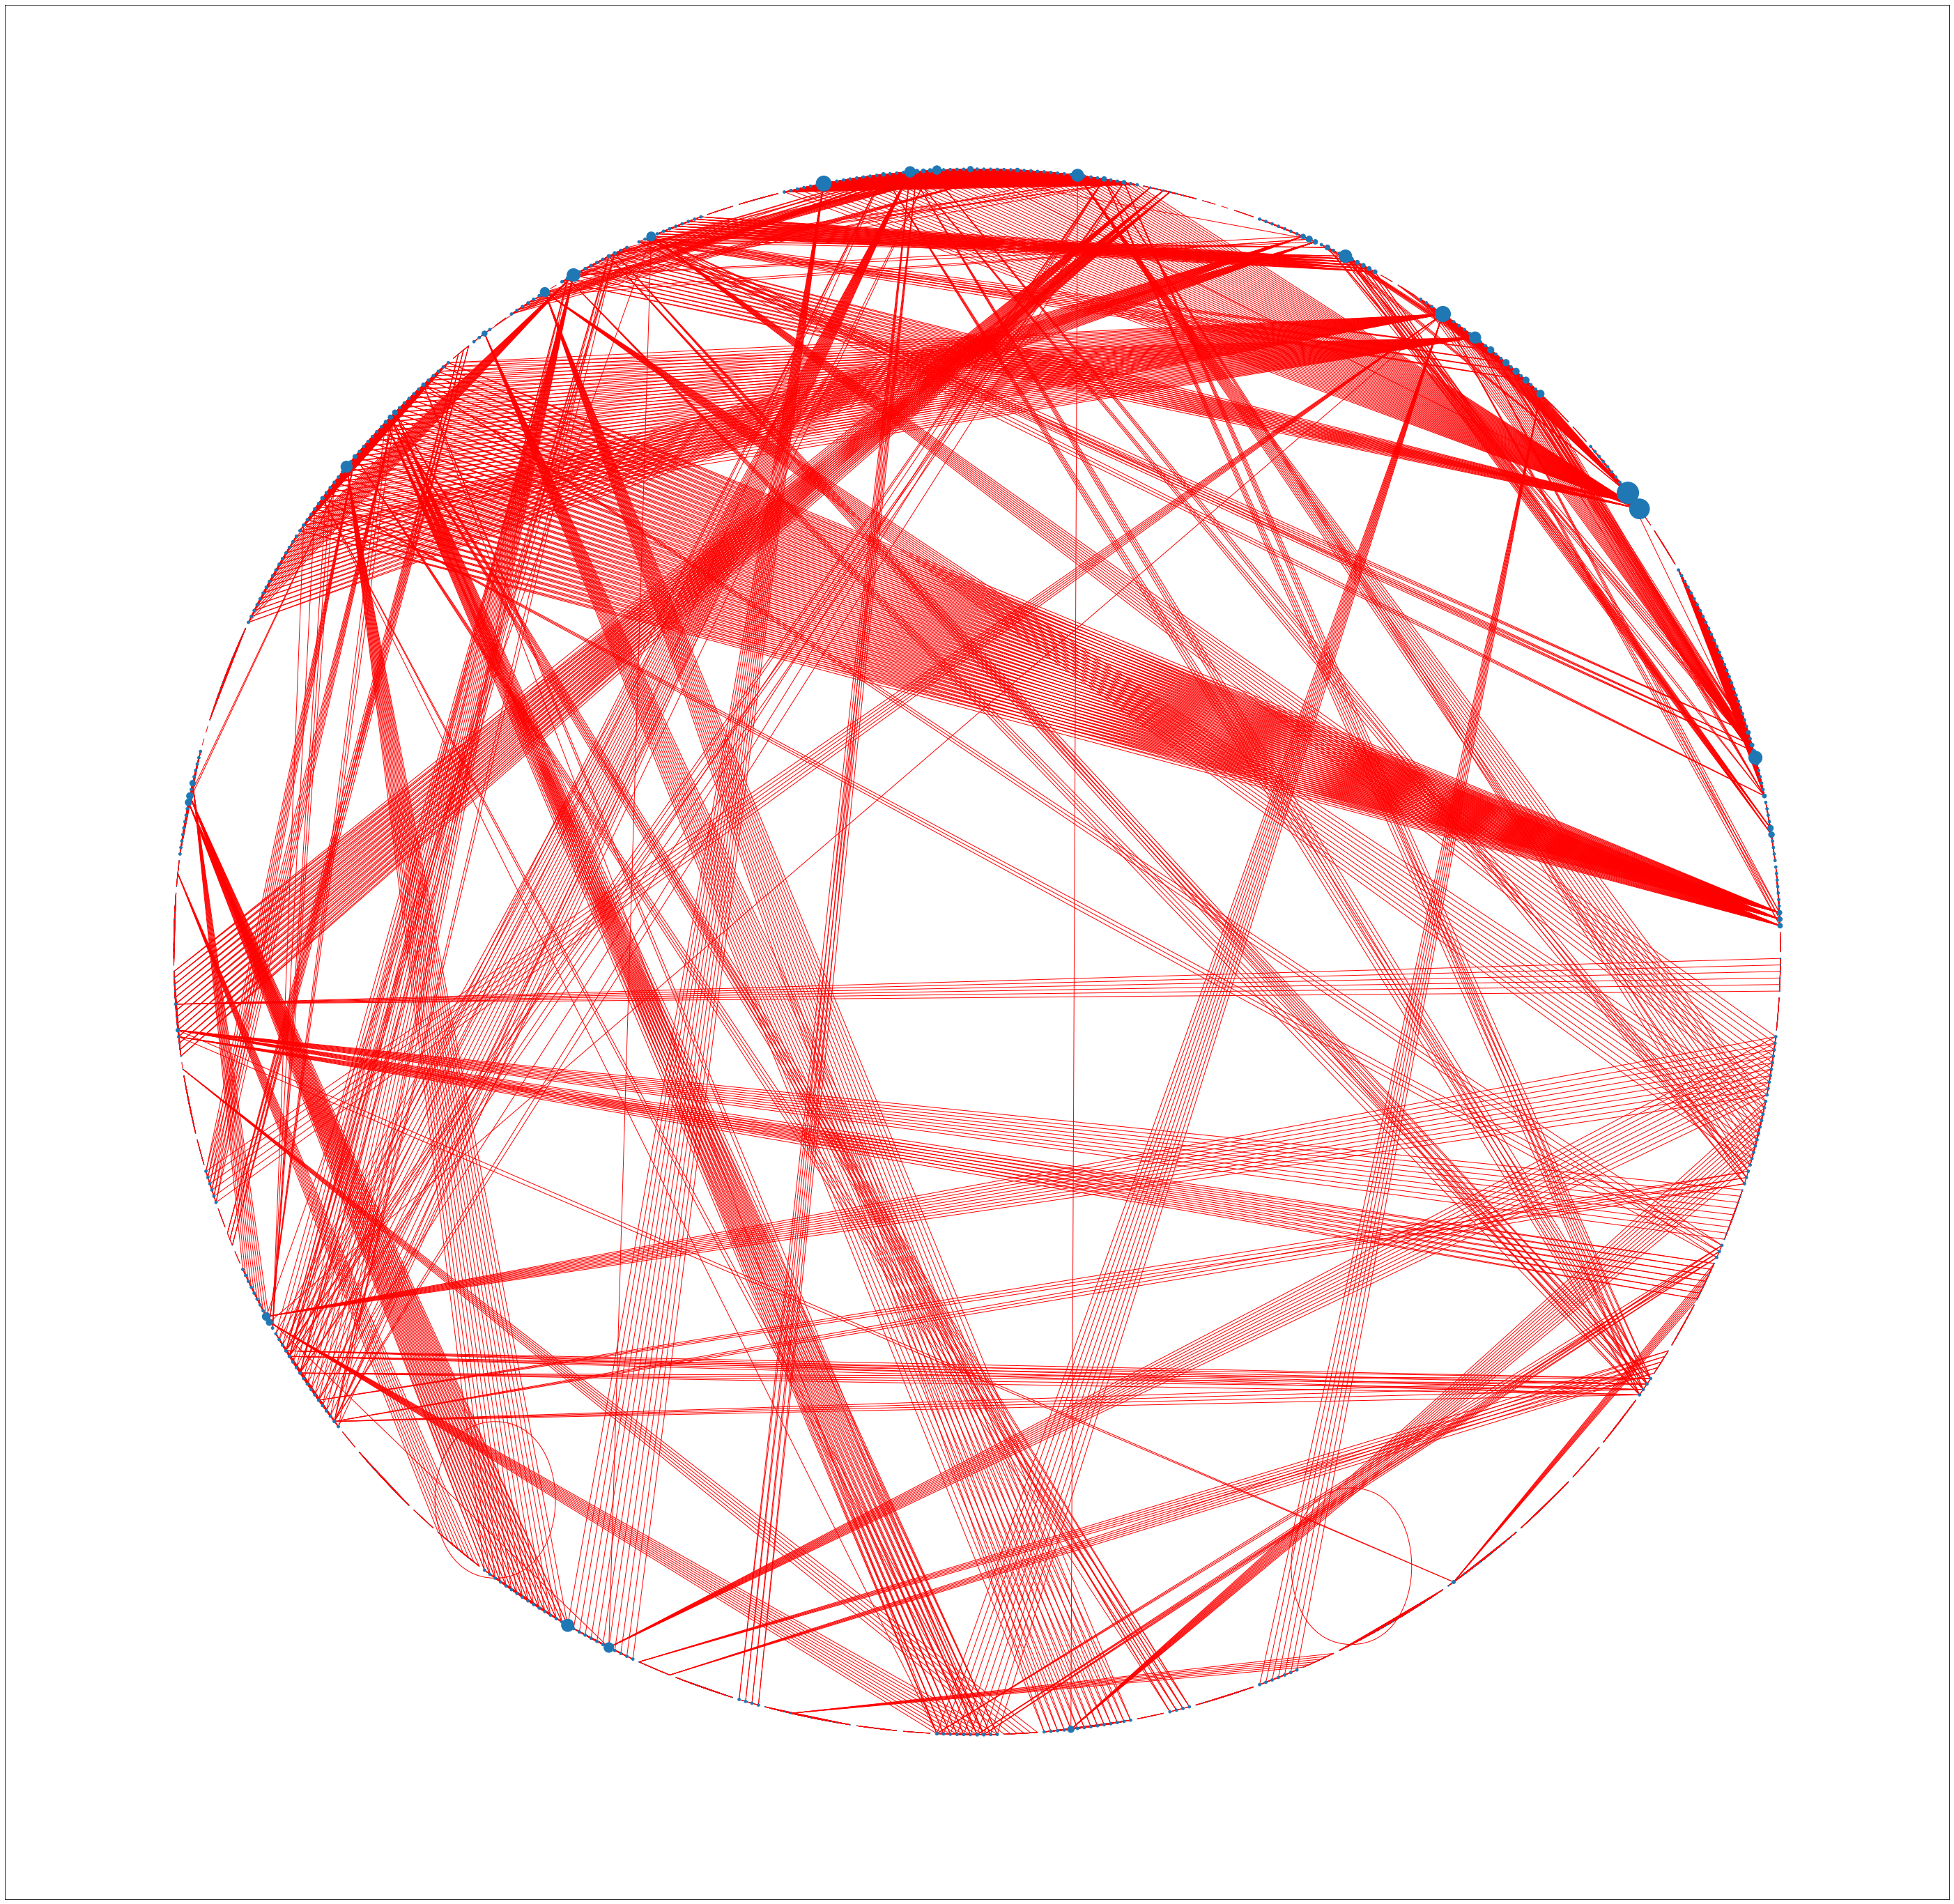

In [11]:
#Betweeness Centrality
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betCent.values()]
pos = nx.circular_layout(G) #positions for all nodes
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=node_size)
#nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Betweeness.png", formant="PNG", dpi=300)
plt.show()

In [12]:
#sorted(betCent, key=betCent.get, reverse=True)

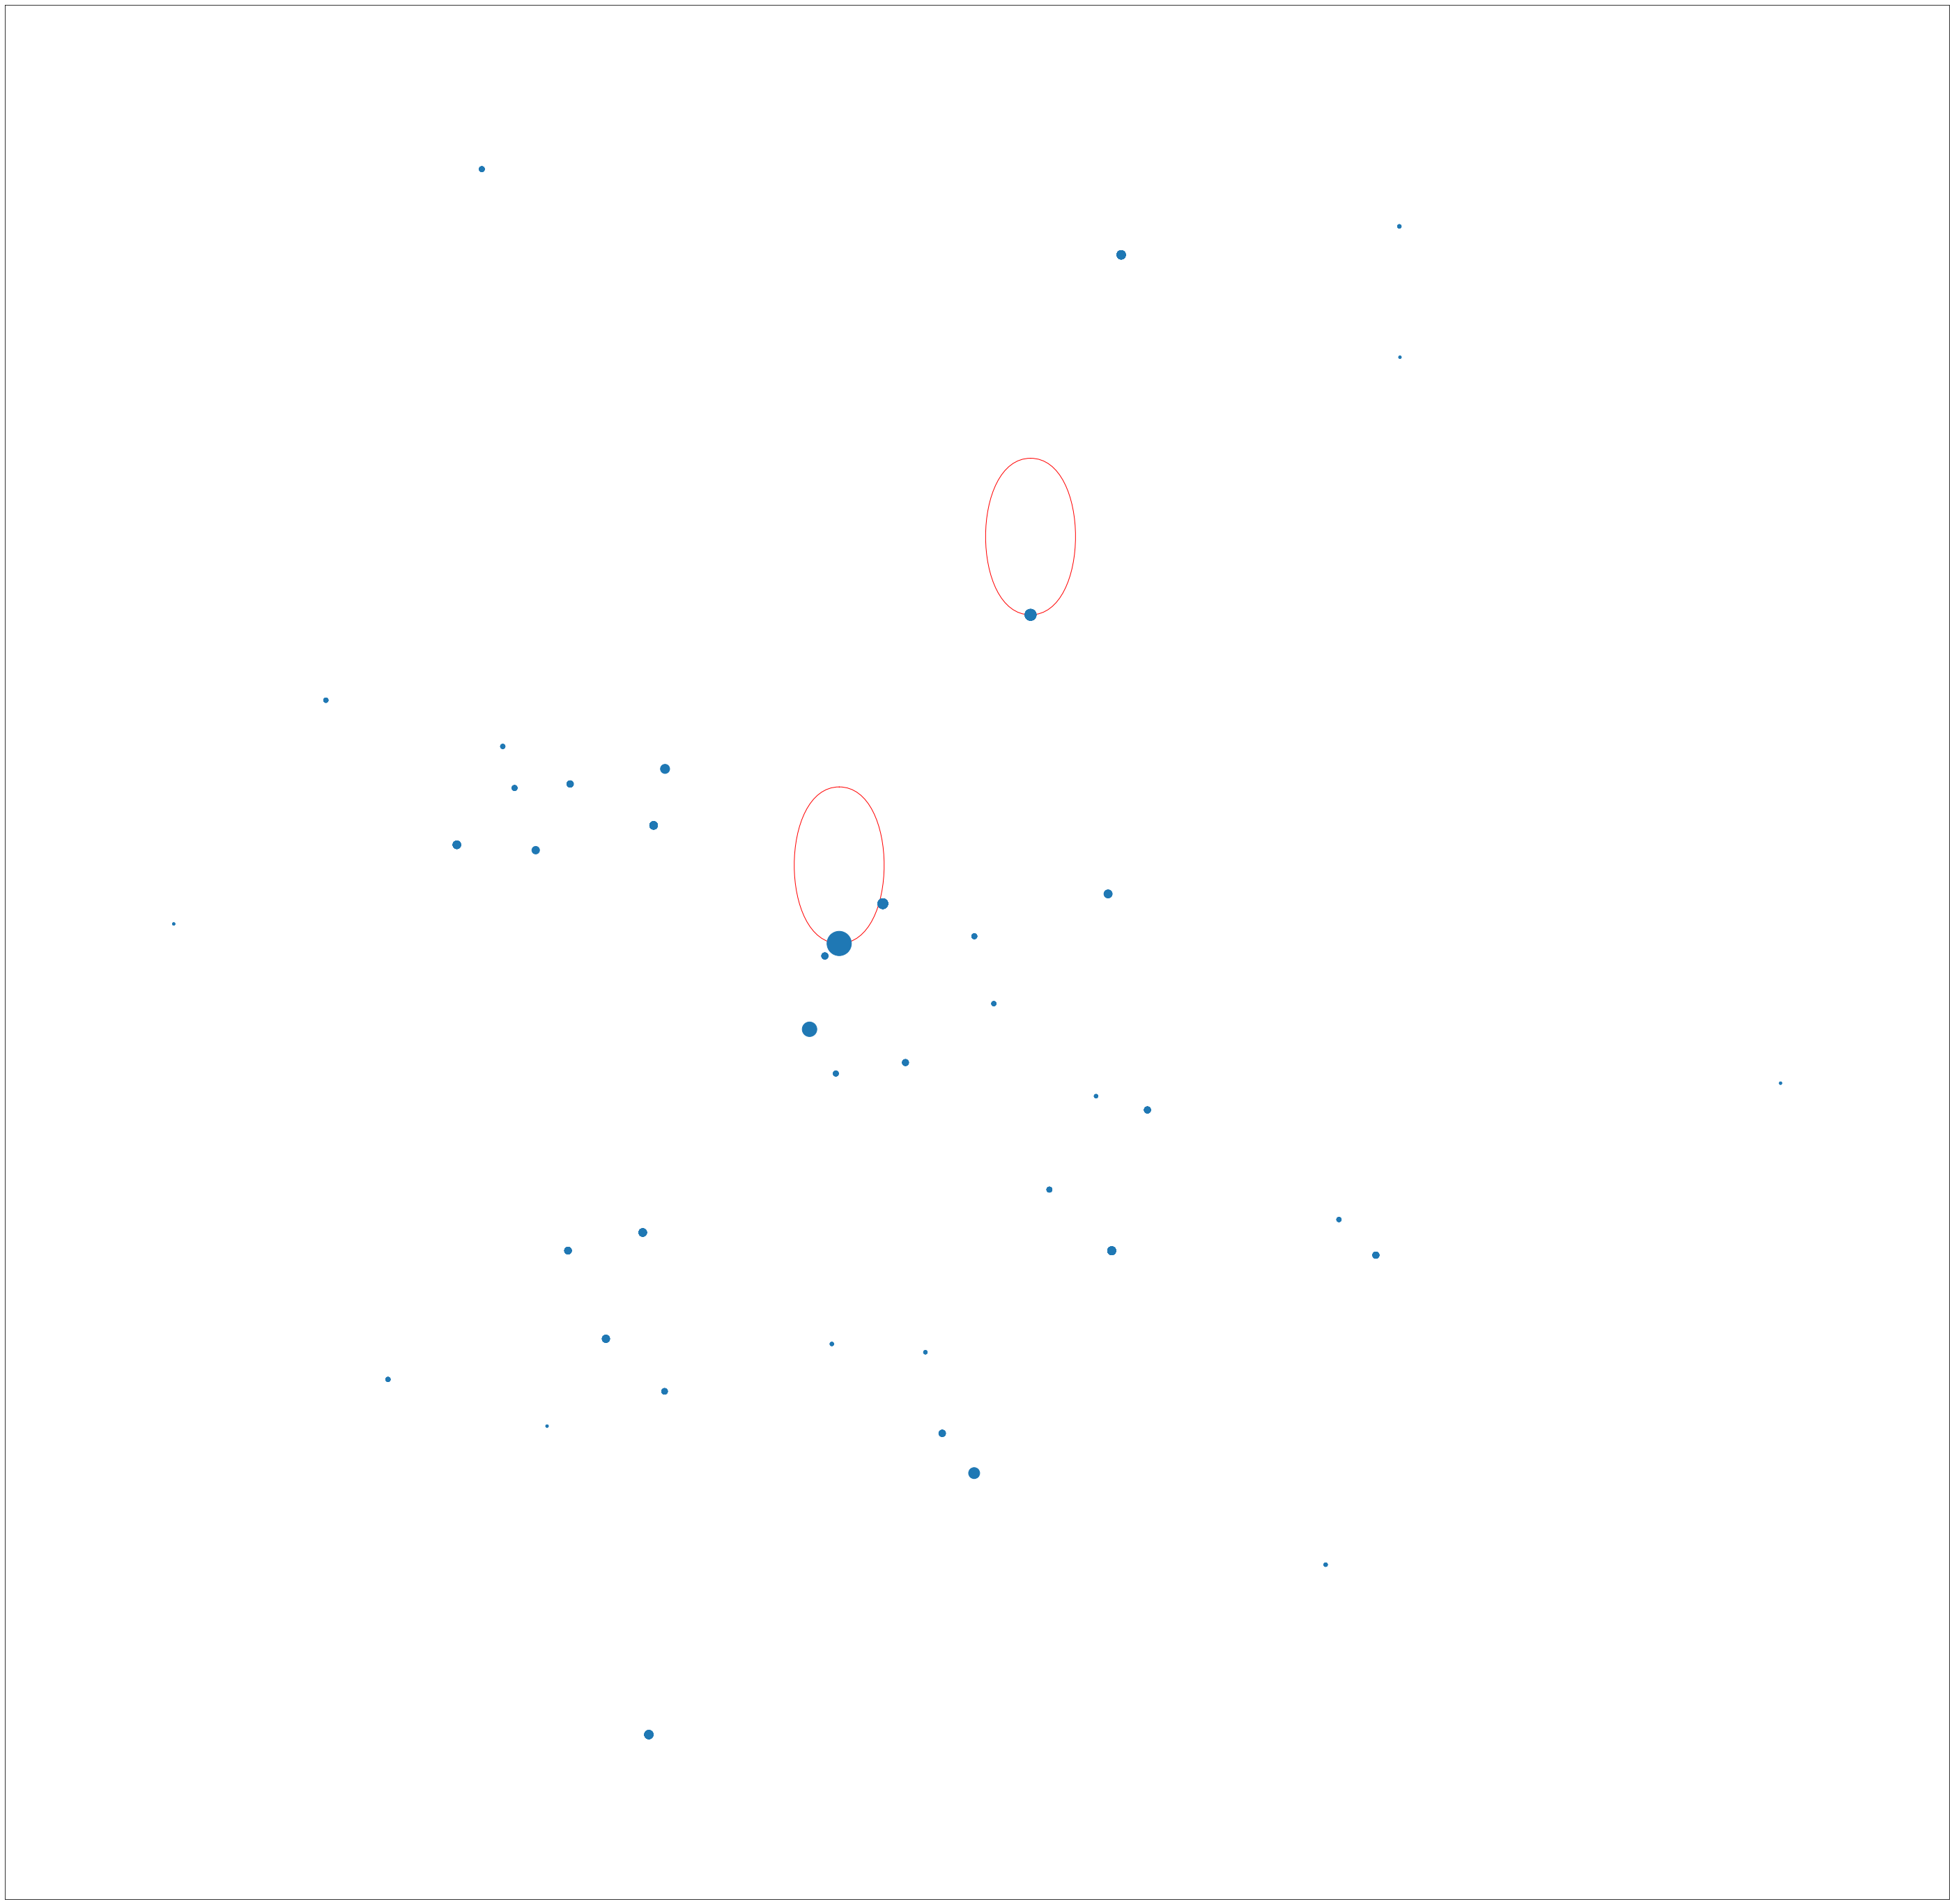

In [13]:
#Degree Centrality
pos = nx.spectral_layout(G)
degCent = nx.degree_centrality(G)
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=node_size)
#nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Degree.png", formant="PNG", dpi=300) 
plt.show()

In [14]:
#sorted(degCent, key=degCent.get, reverse=True)

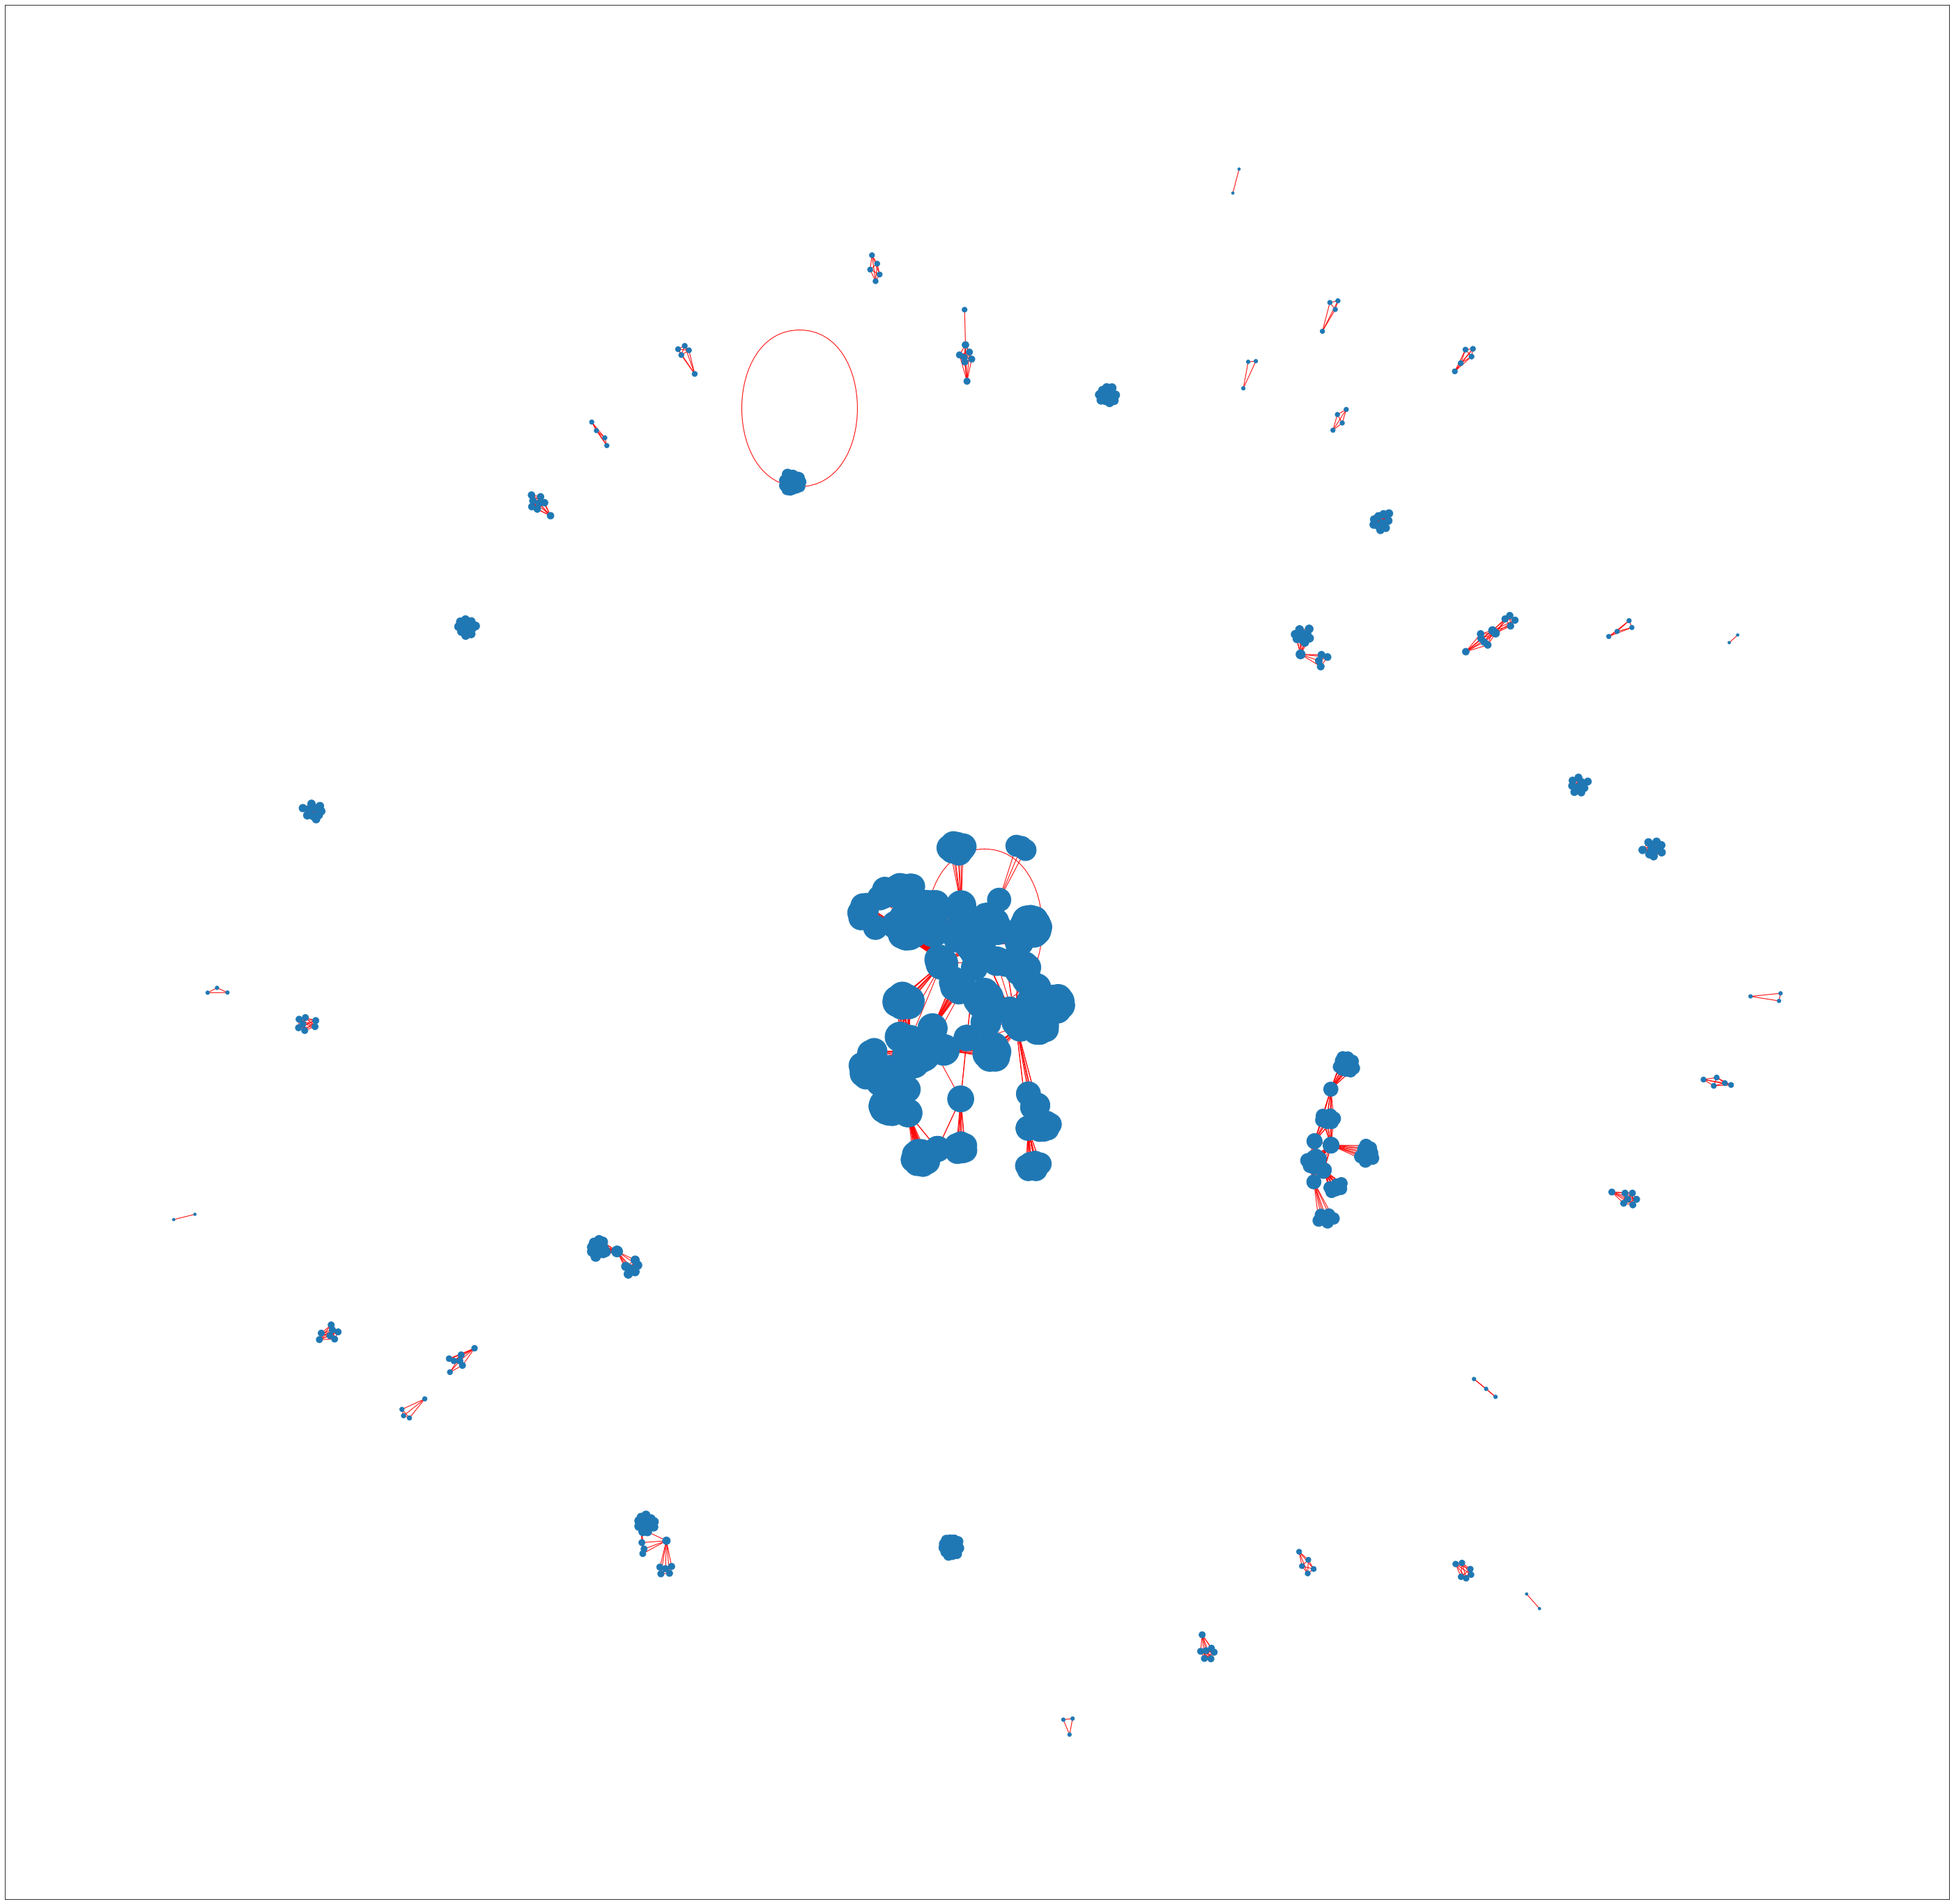

In [15]:
#Closeness Centrality
pos = nx.spring_layout(G)
cloCent = nx.closeness_centrality(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=node_size)
#nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Closeness.png", formant="PNG", dpi=300)
plt.show()

In [16]:
# sorted(cloCent, key=cloCent.get, reverse=True)

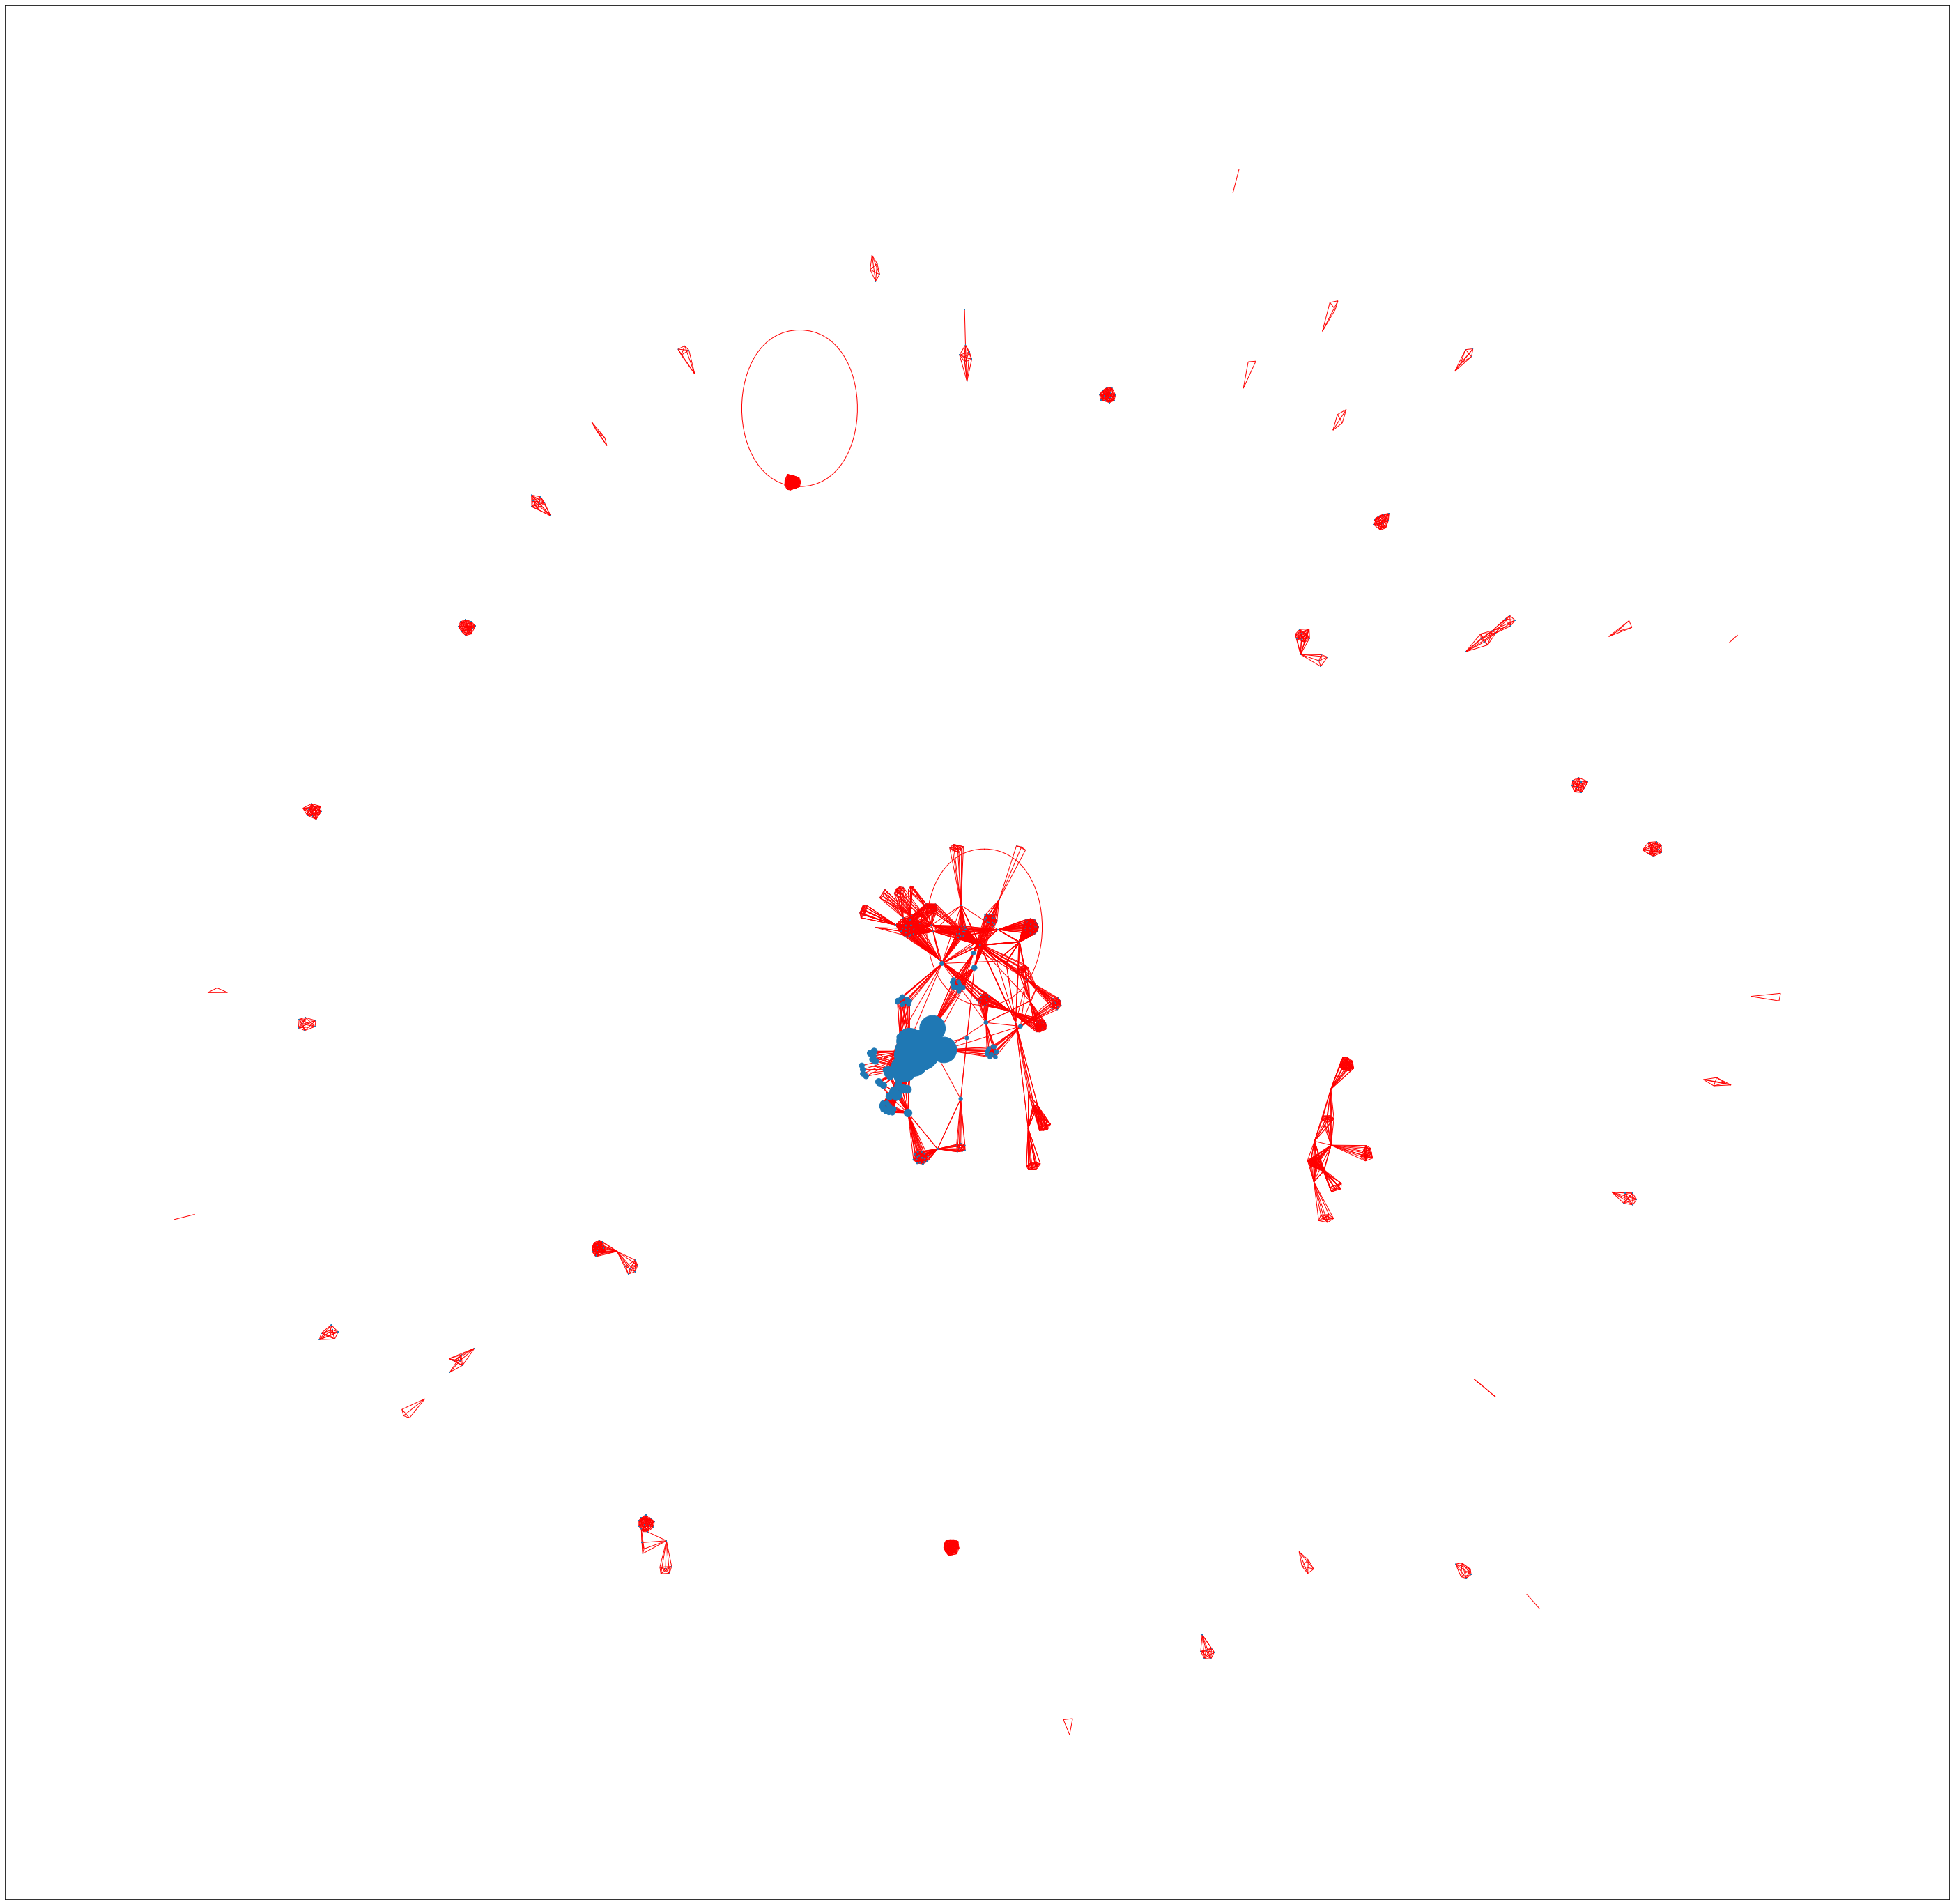

In [17]:
#Eigen Vector Centrality
eigCent = nx.eigenvector_centrality(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=node_size)
#nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Eigen.png", formant="PNG", dpi=300) 
plt.show()

In [18]:
# sorted(eigCent, key=eigCent.get, reverse=True)

We have collected the data from Rochester Police Department. Here we have populated a general network and calculated the centrality scores for all the data points.<br>
In the future we will be working on the modeling and prediction phase. With the help of the collected matrix we will construct an appropriate model to identify the perpetrator of the violence in the test set.